In [37]:
import pandas as pd
import requests
import urllib.parse
import geopy.distance
import numpy as np

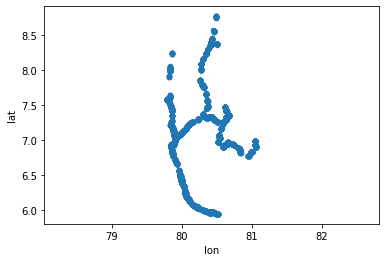

In [38]:
df1=pd.read_csv('trainCracksFinalData.csv')
import matplotlib.pyplot as plt

ax =df1.plot(kind='scatter', x='lon', y='lat')
ax.axis('equal')

# plt.savefig('trainValues.svg', format='svg', bbox_inches='tight')
# plt.savefig('sine_wave.png', dpi=300)
plt.show()

In [39]:
df1.head(2)

,lat,lon,crackCount
0,6.934039,79.850372,64
1,6.929237,79.865796,48


In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

X = scaler1.fit_transform(df1[['lat','lon']])
y=scaler2.fit_transform(df1[['crackCount']])


In [41]:
import pickle
scalerfile1 = 'scalerCracks.sav'
scalerfile2 = 'scalerCracksYData.sav'
pickle.dump(scaler1, open(scalerfile1, 'wb'))
pickle.dump(scaler2, open(scalerfile2, 'wb'))

In [42]:
print(X.shape,y.shape)

(3633, 2) (3633, 1)


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# Creating the polynomial features of degree 2
poly = PolynomialFeatures(degree=80)
X_poly = poly.fit_transform(X)

# Creating the regression model
regressor = LinearRegression()

# Training the model on the polynomial features
regressor.fit(X_poly, y)

# Predicting the output
y_pred_train = regressor.predict(X_poly)

# Printing the coefficients and intercept

# print("Coefficients: ", regressor.coef_)
# print("Intercept: ", regressor.intercept_)

In [59]:
from sklearn.metrics import r2_score
# calculate R-squared of the model
r2 = r2_score(y, y_pred_train)
print("R-squared score train: ", r2)

R-squared score train:  0.6487671509018712


In [61]:
# save model
import joblib

joblib.dump(regressor, 'crackDetecter')
joblib.dump(poly, 'crackDetecterPolynomial')

# load and predict
poilynomia_features_model = joblib.load('crackDetecterPolynomial')
themodel = joblib.load('crackDetecter')

X_val_prep = poilynomia_features_model.transform(X)
predictions = themodel.predict(X_val_prep)